In [1]:
from branching_model import Phylogeny

phylogeny = Phylogeny.Phylogeny(
    is_cell=True, learning_rate=0.05, baseline_growth_rate=0.005
)
detection_cell_count = 1000
n_timesteps_treatment = 40
phylogeny.run_simulation(detection_cell_count, n_timesteps_treatment)

growth rates: 0.0028302451968193055 ± 0.0
growth rates: 0.0028381321330865224 ± 3.232890300571578e-06
growth rates: 0.0028460989147424697 ± 5.161109278721372e-06
growth rates: 0.002856346827286941 ± 9.49424962719537e-06
growth rates: 0.00286277049779892 ± 9.402768968359651e-06
growth rates: 0.002867926210165023 ± 8.673343585046542e-06
growth rates: 0.002877388998218205 ± 1.190074780097203e-05
growth rates: 0.0028851292128192966 ± 1.3819843773495073e-05
growth rates: 0.0028911064994154552 ± 1.4052324442813316e-05
growth rates: 0.0028975111054717947 ± 1.436535495426688e-05
growth rates: 0.002903915663611972 ± 1.406632389324241e-05
growth rates: 0.00291076638249762 ± 1.4514638600113172e-05
Detected 1004 cells at timestep 12, running treatment 0
growth rates: -0.0007868738992961342 ± 7.73940907490492e-06
growth rates: -0.0007774369146876442 ± 7.631338226637853e-06
growth rates: -0.0007680714815374343 ± 7.5625942246442385e-06
growth rates: -0.0007586853914871449 ± 7.449318540108951e-06
grow

(-1521.3500000000001, 31970.35)

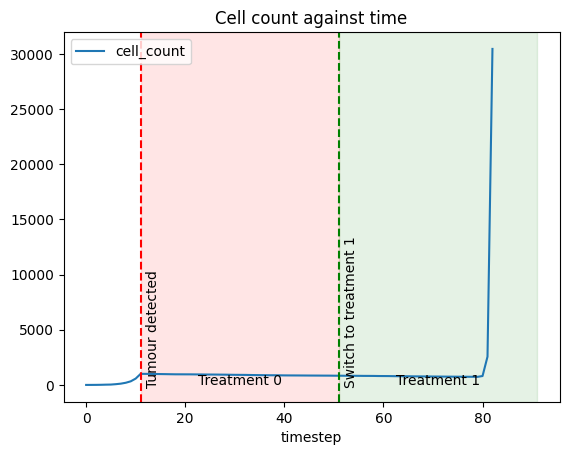

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cell_counts = pd.read_csv("logs/cell_counts.csv")
# plot the cell counts against time
fig, ax = plt.subplots()
cell_counts.plot(x="timestep", y="cell_count", title="Cell count against time", ax=ax)
time_reached_detection = cell_counts[
    cell_counts["cell_count"] >= detection_cell_count
].iloc[0]["timestep"]
ax.axvline(x=time_reached_detection, color="red", linestyle="--")
ax.text(time_reached_detection + 1, 0, "Tumour detected", rotation=90)
ax.axvline(
    x=time_reached_detection + n_timesteps_treatment,
    color="green",
    linestyle="--",
    label="Switch to treatment 1",
)
ax.text(
    time_reached_detection + n_timesteps_treatment + 1,
    0,
    "Switch to treatment 1",
    rotation=90,
)
ax.text(
    time_reached_detection + n_timesteps_treatment / 2, 0, "Treatment 0", ha="center"
)
ax.text(
    time_reached_detection + n_timesteps_treatment + n_timesteps_treatment / 2,
    0,
    "Treatment 1",
    ha="center",
)
ylim = ax.get_ylim()
ax.fill_betweenx(
    ylim,
    time_reached_detection,
    time_reached_detection + n_timesteps_treatment,
    alpha=0.1,
    color="red",
)
ax.fill_betweenx(
    ylim,
    time_reached_detection + n_timesteps_treatment,
    time_reached_detection + n_timesteps_treatment * 2,
    alpha=0.1,
    color="green",
)
ax.set_ylim(ylim)

In [3]:
cell_phenotypes = pd.read_csv("logs/cell_phenotypes.csv")
cell_phenotypes

,timestep,cell_id,susceptible,resistant_0,resistant_1
0,0,0,0.276748,0.268590,0.454662
1,1,0,0.278059,0.268234,0.453707
2,1,1,0.279375,0.267876,0.452749
3,1,2,0.280698,0.267515,0.451787
4,2,0,0.279375,0.267876,0.452749
...,...,...,...,...,...
105294,82,30728,0.276362,0.172269,0.551369
105295,82,30729,0.257039,0.151131,0.591830
105296,82,30730,0.272273,0.164595,0.563132
105297,82,30731,0.275567,0.171296,0.553137


MovieWriter imagemagick unavailable; using Pillow instead.


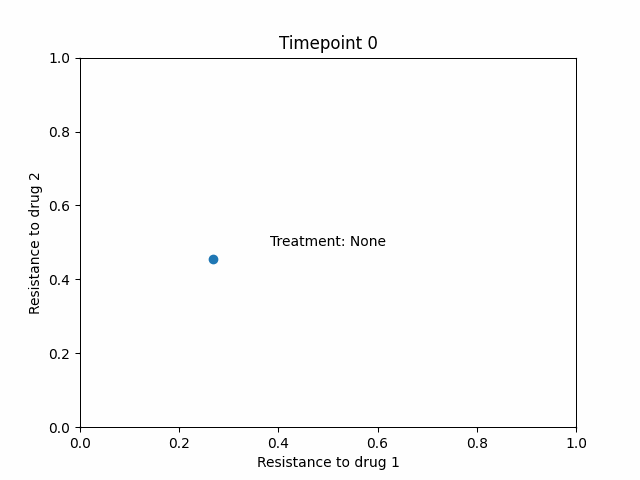

In [4]:
# animated scatter plot of resistant_0 against resistant_1 at each timepoint
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

treatments_by_timepoint = [
    (
        None
        if timestep < time_reached_detection
        else 1
        if timestep < time_reached_detection + n_timesteps_treatment
        else 2
    )
    for timestep in cell_phenotypes["timestep"].unique()
]


def update(timepoint: int):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Timepoint {timepoint}")
    ax.scatter(
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_0"],
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_1"],
    )
    ax.set_xlabel("Resistance to drug 1")
    ax.set_ylabel("Resistance to drug 2")
    ax.text(
        0.5,
        0.5,
        f"Treatment: {treatments_by_timepoint[timepoint]}",
        ha="center",
        va="center",
    )


ani = animation.FuncAnimation(fig, update, frames=cell_phenotypes["timestep"].unique())
ani.save("tests/cell_phenotypes.gif", writer="imagemagick", fps=10)
plt.close()
# show the gif
from IPython.display import Image

Image("tests/cell_phenotypes.gif")